In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [167]:
import warnings
warnings.filterwarnings('ignore')

In [168]:
LP=pd.read_csv("train_ctrUa4K.csv")

In [169]:
LP.shape

(614, 13)

In [170]:
LP.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [171]:
LP.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [172]:
LP.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [173]:
LP.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [174]:
LP.describe(include="object")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001138,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [175]:
#observation: count is not 614 in some of the columns there might be null values.credit_history column has 0 min and 1 max value so it is the category variable.

In [176]:
## Missing values

In [177]:
LP.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [178]:
## number of unique values

In [179]:
# for col in LP.columns:
#     print(col)
#     print("{} has {} no. of unique values and levels are {}".format(col, LP.col.nunique(), LP.col.unique()))

In [180]:
LP.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [181]:
for col in LP.columns:
    if(LP[col].nunique() == LP.shape[0]):
        LP.drop([col],axis=1,inplace=True)
        print(col)

Loan_ID


In [182]:
LP.shape #Loan_ID is dropped

(614, 12)

In [183]:
## type casting

In [184]:
LP.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [185]:
for col in LP.columns:
    if(LP[col].nunique() <5):
        LP[col]=LP[col].astype("category")
        print(col,"-",LP[col].dtype)
    else:
       # LP[col] = pd.to_numeric(LP[col],errors="coerce")
        LP[col]=LP[col].astype("float")
        print(col,LP[col].dtype)

Gender - category
Married - category
Dependents - category
Education - category
Self_Employed - category
ApplicantIncome float64
CoapplicantIncome float64
LoanAmount float64
Loan_Amount_Term float64
Credit_History - category
Property_Area - category
Loan_Status - category


In [186]:
## Target column distribution

In [187]:
LP.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [188]:
LP.Loan_Status.value_counts(normalize=True)*100

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

In [189]:
# not so balanced .

In [190]:
# Selecting duplicate rows except first  
# occurrence based on all columns 
duplicate = LP[LP.duplicated()] 
  
print("Duplicate Rows :") 
  
# Print the resultant Dataframe 
duplicate 

Duplicate Rows :


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [191]:
# there are no duplicate rows

In [192]:
for i in LP.columns:
    x = LP[i].nunique()
    y = list(LP[i].unique())
    z = LP[i].value_counts()
    print('**************************************')
    print(f'Feature: {i} --> {x} unique variables \nThe list of unique variables is {y} \nTheir count is: \n{z} ')

**************************************
Feature: Gender --> 2 unique variables 
The list of unique variables is ['Male', 'Female', nan] 
Their count is: 
Male      489
Female    112
Name: Gender, dtype: int64 
**************************************
Feature: Married --> 2 unique variables 
The list of unique variables is ['No', 'Yes', nan] 
Their count is: 
Yes    398
No     213
Name: Married, dtype: int64 
**************************************
Feature: Dependents --> 4 unique variables 
The list of unique variables is ['0', '1', '2', '3+', nan] 
Their count is: 
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64 
**************************************
Feature: Education --> 2 unique variables 
The list of unique variables is ['Graduate', 'Not Graduate'] 
Their count is: 
Graduate        480
Not Graduate    134
Name: Education, dtype: int64 
**************************************
Feature: Self_Employed --> 2 unique variables 
The list of unique variables is ['No', 'Y

**************************************
Feature: Property_Area --> 3 unique variables 
The list of unique variables is ['Urban', 'Rural', 'Semiurban'] 
Their count is: 
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64 
**************************************
Feature: Loan_Status --> 2 unique variables 
The list of unique variables is ['Y', 'N'] 
Their count is: 
Y    422
N    192
Name: Loan_Status, dtype: int64 


In [193]:
LP.dtypes

Gender               category
Married              category
Dependents           category
Education            category
Self_Employed        category
ApplicantIncome       float64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History       category
Property_Area        category
Loan_Status          category
dtype: object

In [194]:
LP.describe(include="all")

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.0,614,614
unique,2,2,4,2,2,NaN,NaN,NaN,NaN,2.0,3,2
top,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,1.0,Semiurban,Y
freq,489,398,345,480,500,NaN,NaN,NaN,NaN,475.0,233,422
mean,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,NaN,NaN,NaN


In [195]:
# EDA

In [196]:
## Univariate Analysis

In [197]:
def barplot(column,df):
#     print('**************************************')
#     print("{} bar plot".format(col))
    plt.figure(figsize = (15,6))
    bar_plot1 = sns.countplot(x=column, data=df)
    plt.xticks(rotation = 45)
    total = len(df[column])
    for p in bar_plot1.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        height = p.get_height()
        bar_plot1.text(p.get_x()+ p.get_width()/2, height + 10,percentage, ha="center")

In [198]:
# cat_attr = list(X_train.select_dtypes(include=['category']).columns)
# num_attr = list(X_train.select_dtypes(include=['number']).columns)

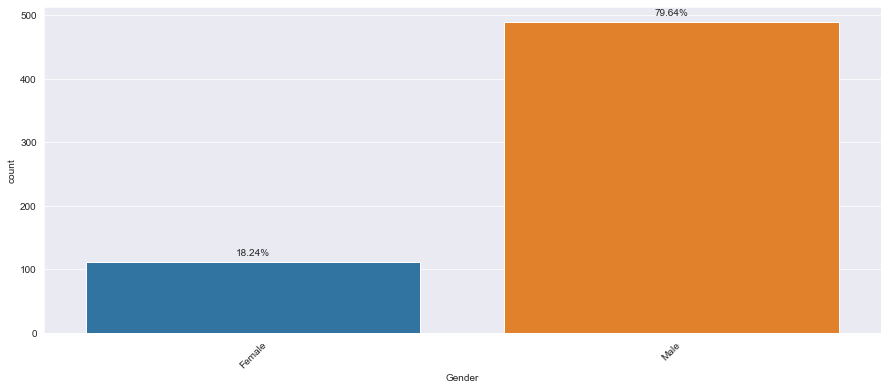

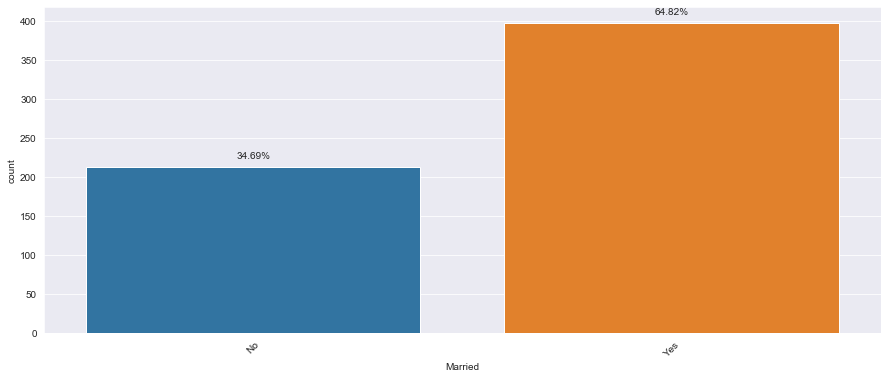

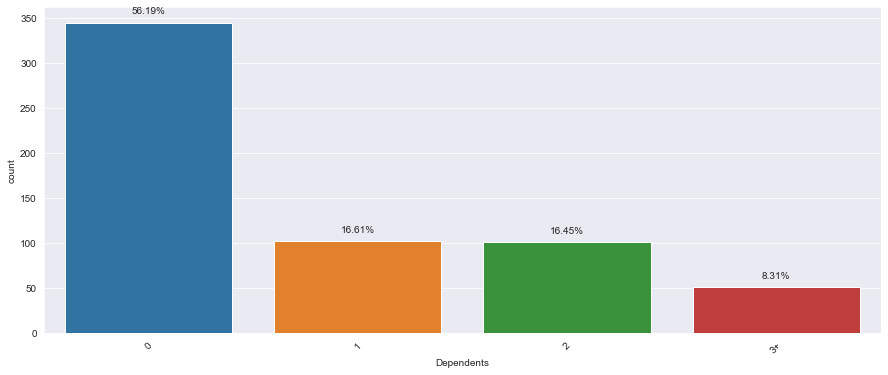

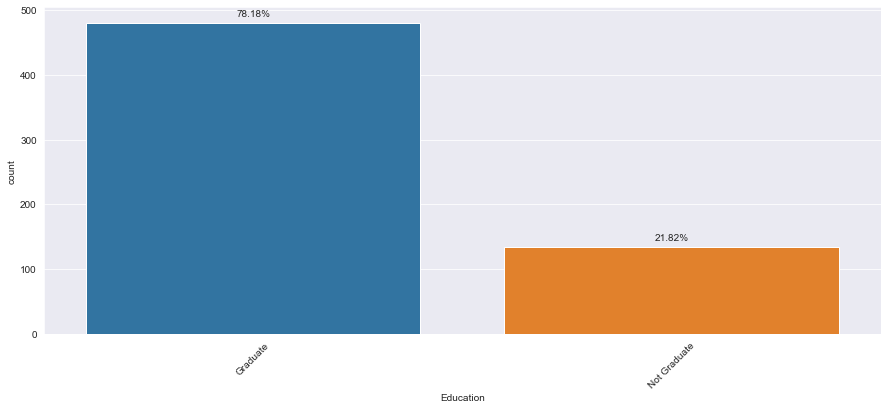

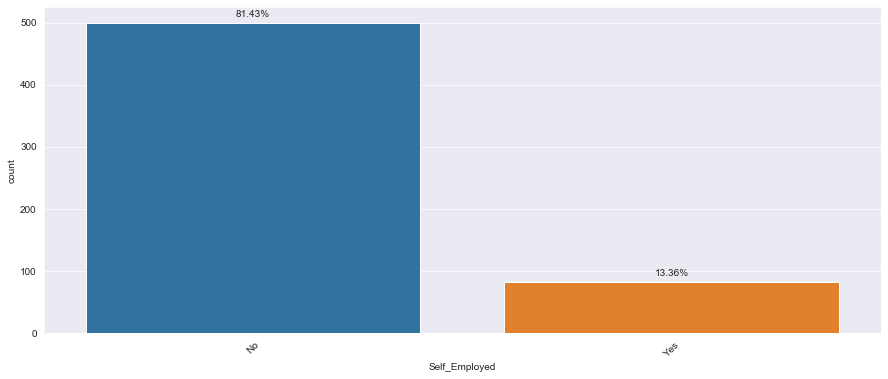

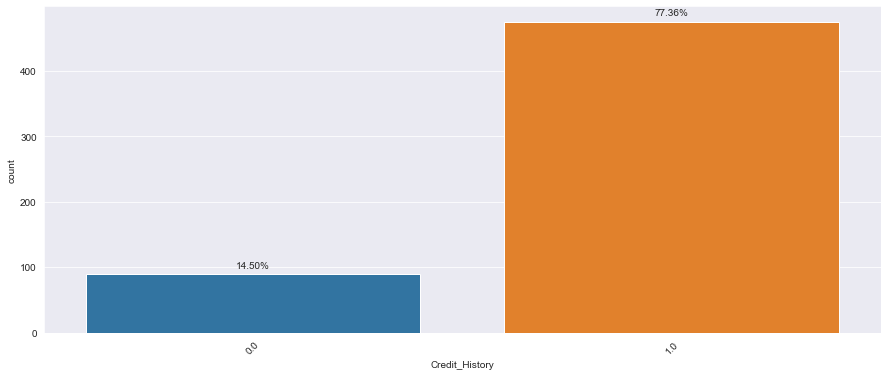

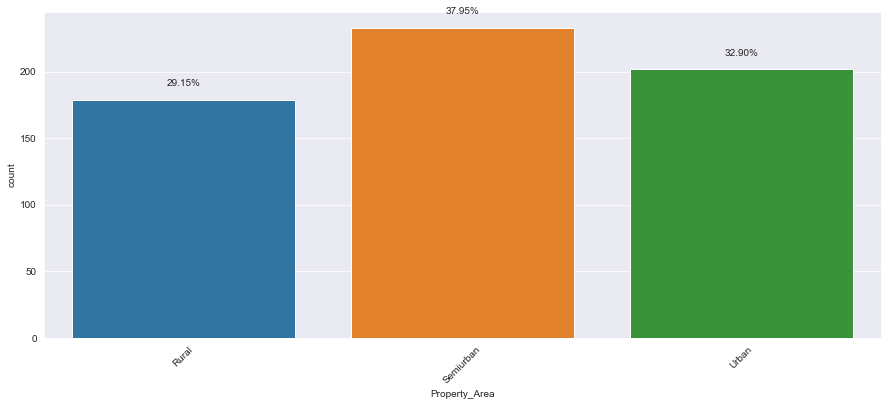

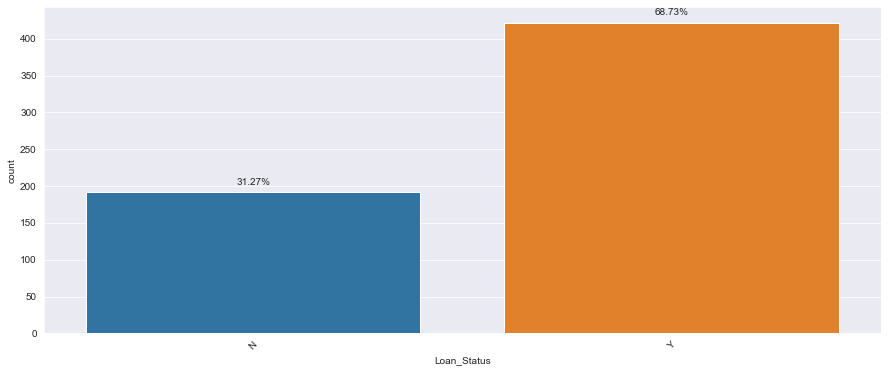

In [199]:
for col in LP.select_dtypes(include=['category']).columns:
       barplot(col,LP)

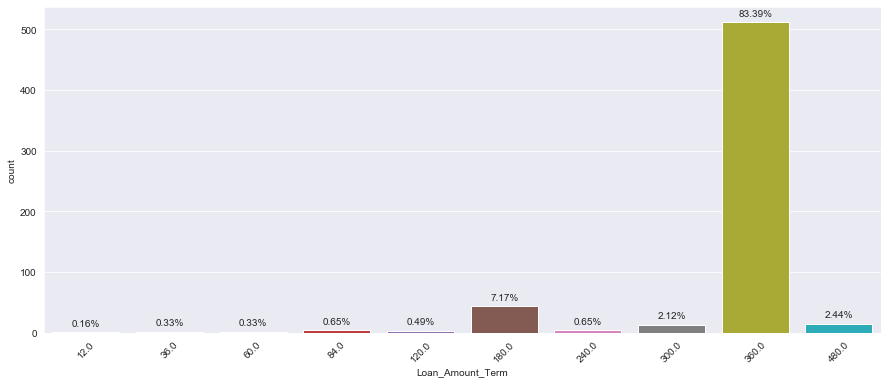

In [200]:
barplot("Loan_Amount_Term",LP)

In [201]:
##binning on Loan_Amount_Term might will work

In [202]:
print(LP['ApplicantIncome'].min())
print(LP['ApplicantIncome'].max())

150.0
81000.0


In [203]:
print(LP['ApplicantIncome'].min())
print(LP['ApplicantIncome'].max())

150.0
81000.0


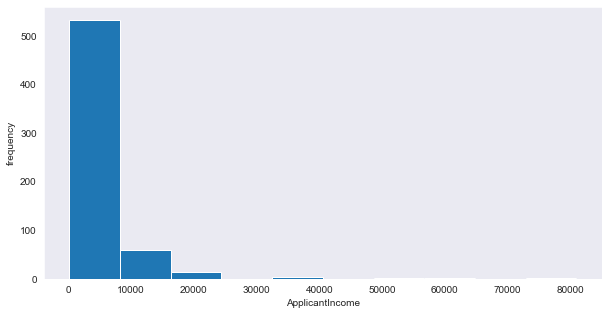

In [204]:
plt.figure(figsize=(10,5))
plt.xlabel("ApplicantIncome")
plt.ylabel("frequency")
#print(Age.mean())

# matplotlib.pyplot.axvline() - This function add the vertical lines across the axes of the plot
#plt.axvline(x=grp_exp.mean(), linewidth=2, color = 'r') 
plt.hist(LP["ApplicantIncome"])
plt.grid()
plt.show()

In [205]:
pd.set_option('display.max_rows', None) 

In [206]:
LP['ApplicantIncome'].value_counts(sort=True,ascending=True)#2500 to 81000

6333.0     1
3340.0     1
6540.0     1
3652.0     1
2787.0     1
6875.0     1
2130.0     1
9538.0     1
63337.0    1
3276.0     1
3716.0     1
7250.0     1
2620.0     1
2346.0     1
3316.0     1
3244.0     1
1875.0     1
1378.0     1
1977.0     1
2708.0     1
5821.0     1
16666.0    1
5333.0     1
5167.0     1
2785.0     1
2499.0     1
18165.0    1
2957.0     1
4945.0     1
6782.0     1
4625.0     1
3155.0     1
3941.0     1
7787.0     1
5468.0     1
13262.0    1
19730.0    1
6277.0     1
33846.0    1
1993.0     1
3523.0     1
3158.0     1
4666.0     1
7578.0     1
6633.0     1
3522.0     1
5726.0     1
1299.0     1
17500.0    1
4755.0     1
39147.0    1
2483.0     1
3095.0     1
2661.0     1
2875.0     1
3497.0     1
4188.0     1
4095.0     1
3865.0     1
4695.0     1
4400.0     1
1880.0     1
2768.0     1
3416.0     1
2192.0     1
2965.0     1
4384.0     1
3816.0     1
7200.0     1
4616.0     1
1928.0     1
1828.0     1
7740.0     1
3600.0     1
7901.0     1
9166.0     1
3593.0     1

In [207]:
LP['ApplicantIncome'].value_counts(sort=True,ascending=False)

2500.0     9
2600.0     6
4583.0     6
6000.0     6
3750.0     5
5000.0     5
3333.0     5
4166.0     5
6250.0     4
2400.0     4
2583.0     4
8333.0     4
3166.0     3
10000.0    3
4333.0     3
3400.0     3
3000.0     3
2333.0     3
5417.0     3
3167.0     3
4000.0     3
3500.0     3
3510.0     2
1820.0     2
1025.0     2
9323.0     2
3159.0     2
3717.0     2
5703.0     2
3418.0     2
3859.0     2
3173.0     2
7333.0     2
5250.0     2
3667.0     2
12000.0    2
4750.0     2
2213.0     2
4283.0     2
2666.0     2
2014.0     2
2383.0     2
5746.0     2
2947.0     2
2479.0     2
2378.0     2
5500.0     2
2083.0     2
3466.0     2
1958.0     2
6400.0     2
8750.0     2
3083.0     2
4300.0     2
2917.0     2
4652.0     2
2833.0     2
14583.0    2
3200.0     2
1800.0     2
7583.0     1
4226.0     1
8566.0     1
3089.0     1
3813.0     1
4708.0     1
1853.0     1
12876.0    1
3993.0     1
5677.0     1
2221.0     1
1759.0     1
3707.0     1
5191.0     1
6325.0     1
3073.0     1
2510.0     1

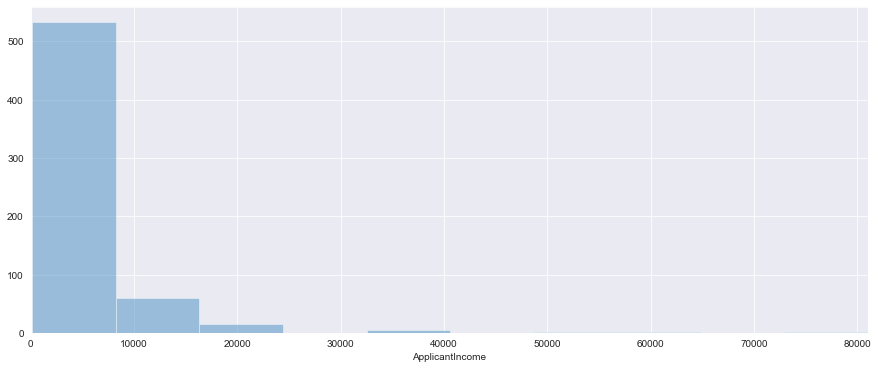

In [208]:
plt.figure(figsize = (15,6))
sns.distplot(LP['ApplicantIncome'],kde = False, bins = 10)#,color = '#ff3800'
plt.xlim((0,81000));

In [209]:
# import numpy as np

# def outliers_iqr(col):
#     quartile_1, quartile_3 = np.percentile(col, [.25, .75])
#     iqr = quartile_3 - quartile_1
#     lower_bound = quartile_1 - (iqr * 1.5)
#     upper_bound = quartile_3 + (iqr * 1.5)
#     return np.where((ys > upper_bound) | (ys < lower_bound))

In [210]:
# columns=["CCAvg","Mortage"]
# print(columns)
# for col in columns:
#     out=outliers_iqr(col)
#     print(out)
#    # outliers_imp=np.percentile()

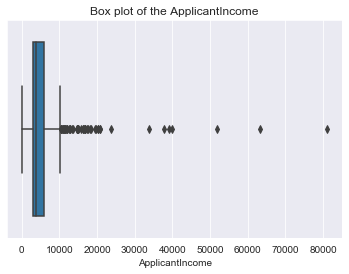

In [211]:
sns.boxplot( LP["ApplicantIncome"]).set_title("Box plot of the ApplicantIncome")
plt.show()

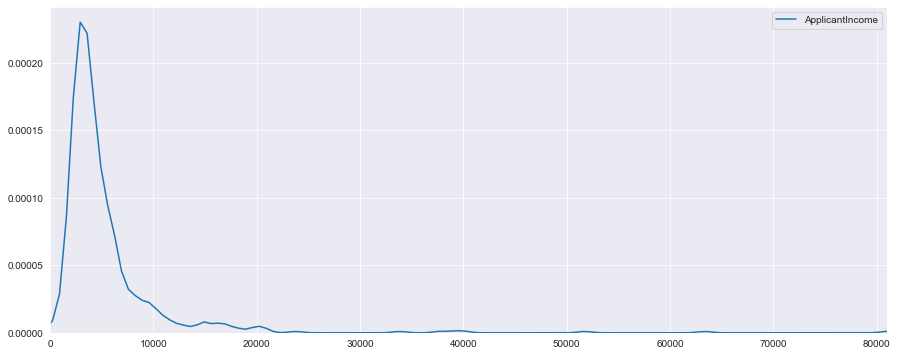

In [212]:
plt.figure(figsize = (15,6))
sns.kdeplot(LP['ApplicantIncome'])
plt.xlim((0,81000)); 

In [213]:
#ApplicantIncome feature is left skewed, not normally distributed. it has so many oultiers along left side 

In [214]:
print(LP["CoapplicantIncome"].max())
print(LP["CoapplicantIncome"].min())

41667.0
0.0


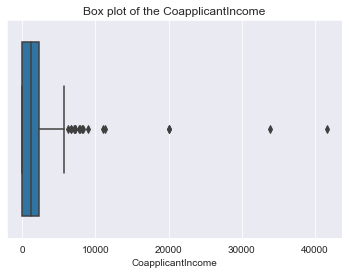

In [215]:
sns.boxplot( LP["CoapplicantIncome"]).set_title("Box plot of the CoapplicantIncome")
plt.show()

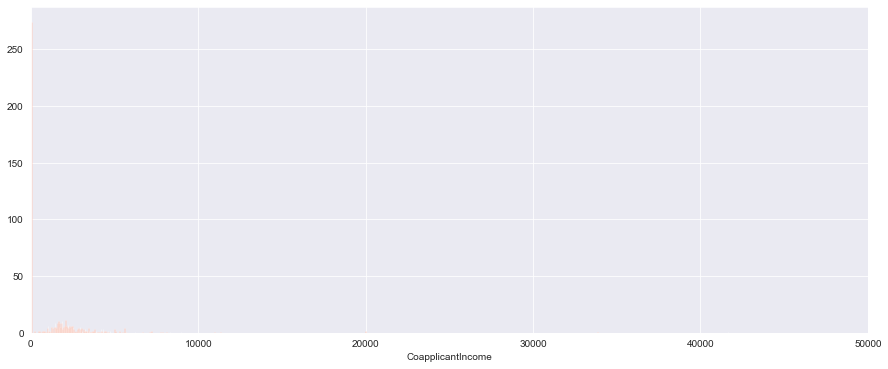

In [216]:
plt.figure(figsize = (15,6))
sns.distplot(LP['CoapplicantIncome'],kde = False, bins = 1000,color = '#ff3800')
plt.xlim((0,50000));

In [217]:
#check with boxplot

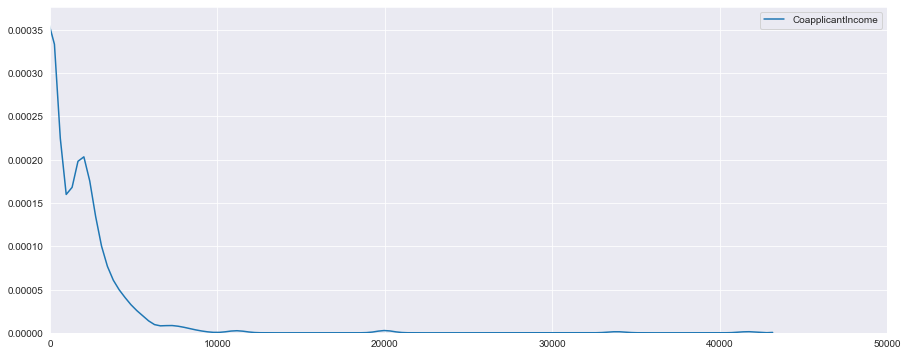

In [218]:
plt.figure(figsize = (15,6))
sns.kdeplot(LP['CoapplicantIncome'])
plt.xlim((0,50000)); 

In [219]:
#CoapplicantIncome feature is not normally distributed. it has so many oultiers along left side .

In [220]:
print(LP["LoanAmount"].max())
print(LP["LoanAmount"].min())

700.0
9.0


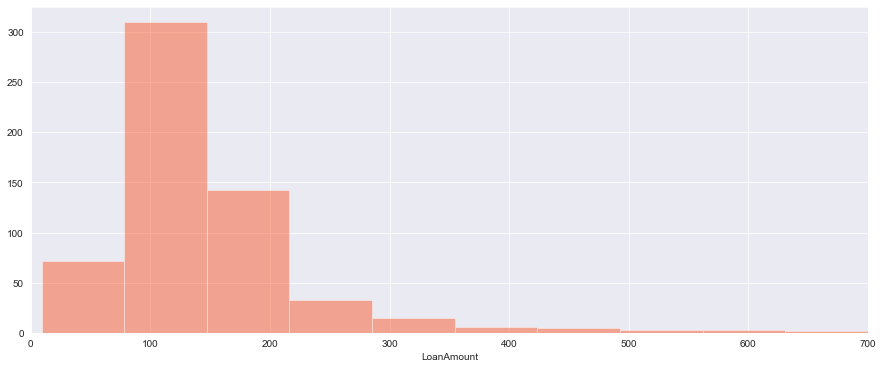

In [221]:
plt.figure(figsize = (15,6))
sns.distplot(LP['LoanAmount'],kde = False, bins = 10,color = '#ff3800')
plt.xlim((0,700));

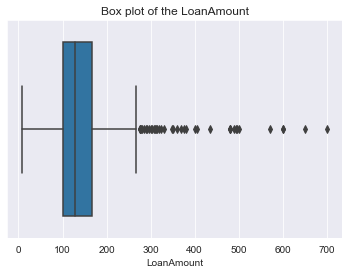

In [222]:
sns.boxplot( LP["LoanAmount"]).set_title("Box plot of the LoanAmount")
plt.show()

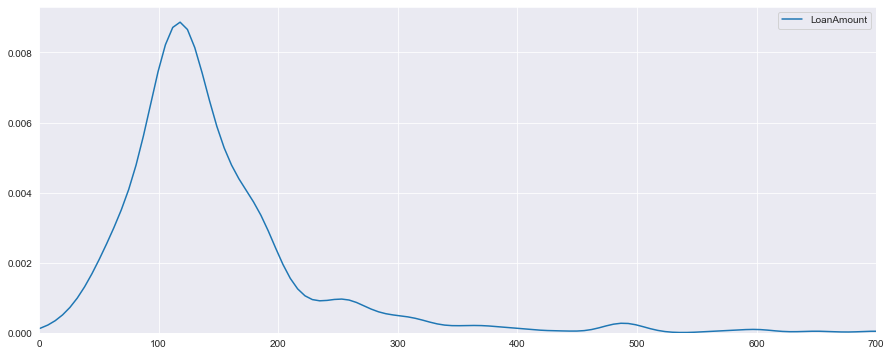

In [223]:
plt.figure(figsize = (15,6))
sns.kdeplot(LP['LoanAmount'])
plt.xlim((0,700)); 

In [224]:
# Loan Amount  variable is fairly normally distributed but it has some outliers.

In [225]:
print(LP["Loan_Amount_Term"].max())
print(LP["Loan_Amount_Term"].min())

480.0
12.0


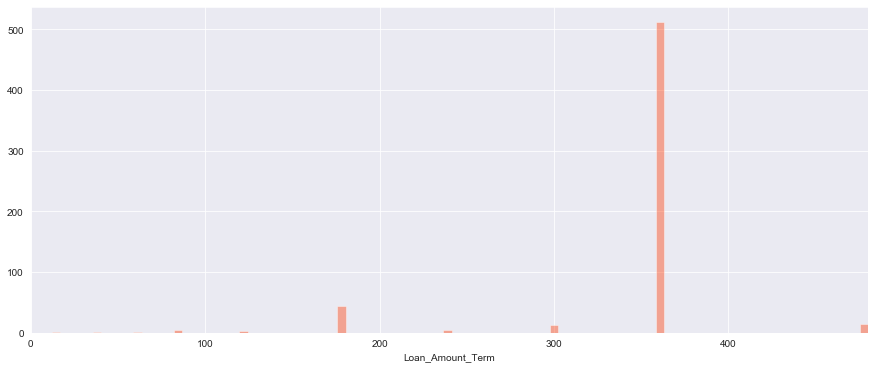

In [226]:
plt.figure(figsize = (15,6))
sns.distplot(LP['Loan_Amount_Term'],kde = False, bins = 100,color = '#ff3800')
plt.xlim((0,480));

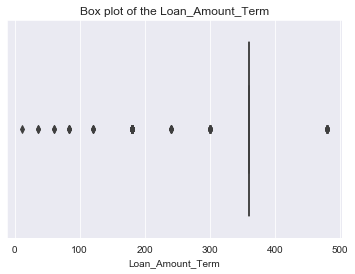

In [227]:
sns.boxplot( LP["Loan_Amount_Term"]).set_title("Box plot of the Loan_Amount_Term")
plt.show()

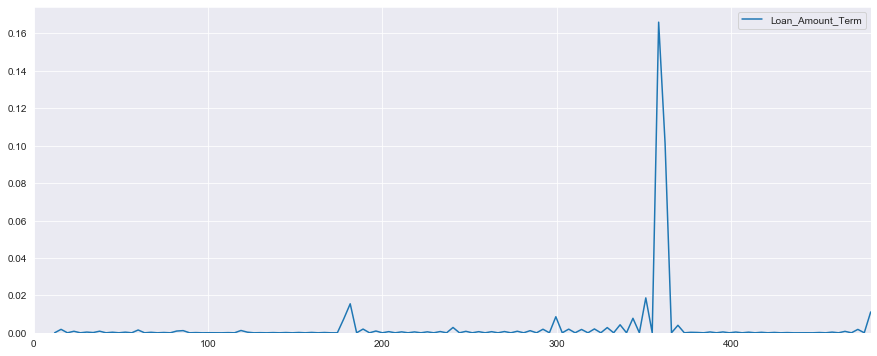

In [228]:
plt.figure(figsize = (15,6))
sns.kdeplot(LP['Loan_Amount_Term'])
plt.xlim((0,480)); 

In [229]:
# Loan Amount Term variable is fairly normally distributed but it has some outliers.

In [230]:
# BiVariate Analysis

In [231]:
def getProbOfLoan(col, target, df, forGraph=True):
    crosstab = pd.crosstab(index = df[col], columns = df[target])
    crosstab.columns = pd.Index(list(crosstab.columns))
    #print(crosstab.columns)
    crosstab = crosstab.reset_index() 
    crosstab['TotalCount'] = crosstab['N'] + crosstab['Y']
    crosstab['Loan_Status'] = crosstab['Y'] / crosstab['TotalCount']
    
    print(crosstab.head())
    if forGraph:
        return crosstab[[col, 'Loan_Status']]
    else:
        return crosstab[[col, 'TotalCount', 'Loan_Status']]

   Gender    N    Y  TotalCount  Loan_Status
0  Female   37   75         112     0.669643
1    Male  150  339         489     0.693252


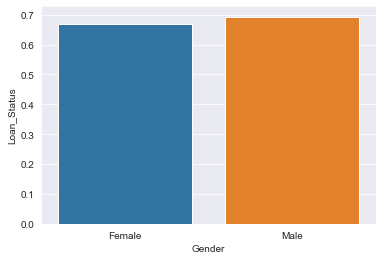

In [232]:
sns.barplot(x = 'Gender',y = 'Loan_Status', data=getProbOfLoan('Gender', 'Loan_Status',LP));
# data=getProbOfChurn('gender', 'Churn',df)

In [233]:
#Male applicants have slightly higher probability of approval of loan.

  Married    N    Y  TotalCount  Loan_Status
0      No   79  134         213     0.629108
1     Yes  113  285         398     0.716080


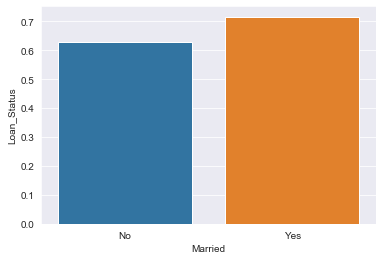

In [234]:
sns.barplot(x = 'Married',y = 'Loan_Status', data=getProbOfLoan('Married', 'Loan_Status',LP));

In [235]:
#Proportion of Married applicants is higher for the approved loans

  Dependents    N    Y  TotalCount  Loan_Status
0          0  107  238         345     0.689855
1          1   36   66         102     0.647059
2          2   25   76         101     0.752475
3         3+   18   33          51     0.647059


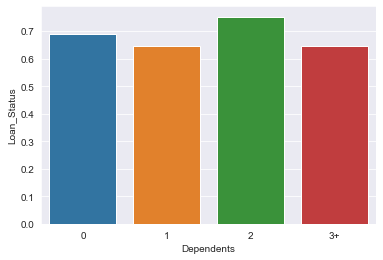

In [236]:
sns.barplot(x = 'Dependents',y = 'Loan_Status', data=getProbOfLoan('Dependents', 'Loan_Status',LP))

In [237]:
# 1 and 3+ Dependents have equal chances of getting loan. with the 2 dependents have higher probability getting loan.
#Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.

      Education    N    Y  TotalCount  Loan_Status
0      Graduate  140  340         480     0.708333
1  Not Graduate   52   82         134     0.611940


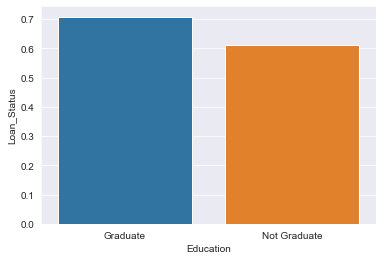

In [238]:
sns.barplot(x = 'Education',y = 'Loan_Status', data=getProbOfLoan('Education', 'Loan_Status',LP))

In [239]:
#Graduate people have more chances of approval of loan.
#Proportion of Graduate applicants is higher for the approved loans.

  Self_Employed    N    Y  TotalCount  Loan_Status
0            No  157  343         500     0.686000
1           Yes   26   56          82     0.682927


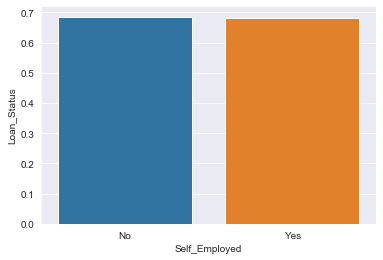

In [240]:
sns.barplot(x = 'Self_Employed',y = 'Loan_Status', data=getProbOfLoan('Self_Employed', 'Loan_Status',LP))

In [241]:
#Self_Employed column has same proportion approval of Loan. There is no variation in the two classes of Self_Employed.
#There is nothing significant we can infer from Self_Employed vs Loan_Status plot

  Credit_History   N    Y  TotalCount  Loan_Status
0            0.0  82    7          89     0.078652
1            1.0  97  378         475     0.795789


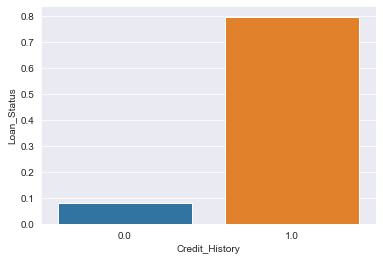

In [242]:
sns.barplot(x = 'Credit_History',y = 'Loan_Status', data=getProbOfLoan('Credit_History', 'Loan_Status',LP));

In [243]:
#The people who has Credit_history as 1 , they will get loan easily.

  Property_Area   N    Y  TotalCount  Loan_Status
0         Rural  69  110         179     0.614525
1     Semiurban  54  179         233     0.768240
2         Urban  69  133         202     0.658416


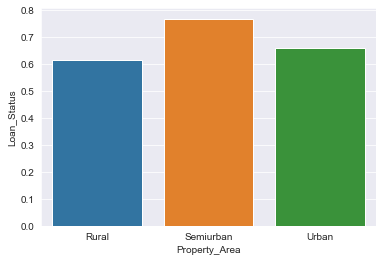

In [244]:
sns.barplot(x = 'Property_Area',y = 'Loan_Status', data=getProbOfLoan('Property_Area', 'Loan_Status',LP))

In [245]:
# semiurban property_area has high probability of getting loan compared to other 2(Rural and Urban). The remaining two Rural and Urban areas have nearly similar proportion of getting Loan.

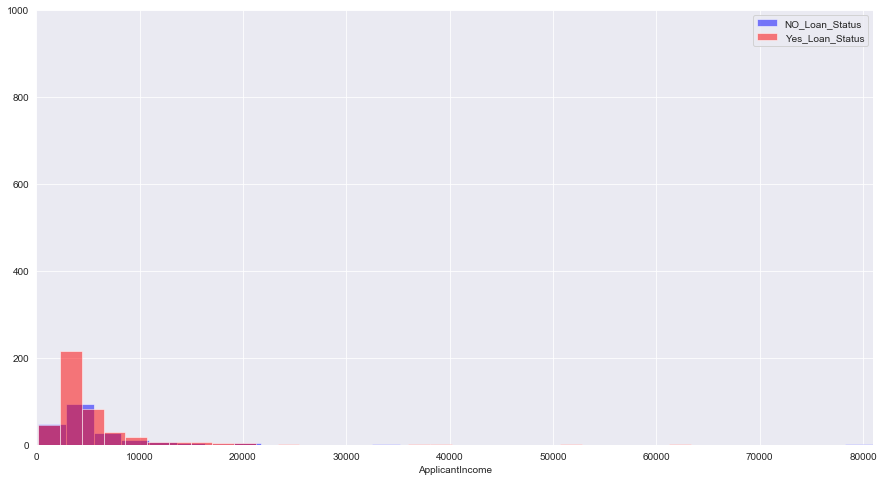

In [246]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,8))
LP[LP['Loan_Status']== 'N']['ApplicantIncome'].hist(alpha=0.5,color='blue',
                                              bins=30,label='NO_Loan_Status')
LP[LP['Loan_Status']=='Y']['ApplicantIncome'].hist(alpha=0.5,color='red',
                                              bins=30,label='Yes_Loan_Status')
plt.legend()
plt.xlabel('ApplicantIncome')
plt.xlim(0,81000)
plt.ylim(0,1000);

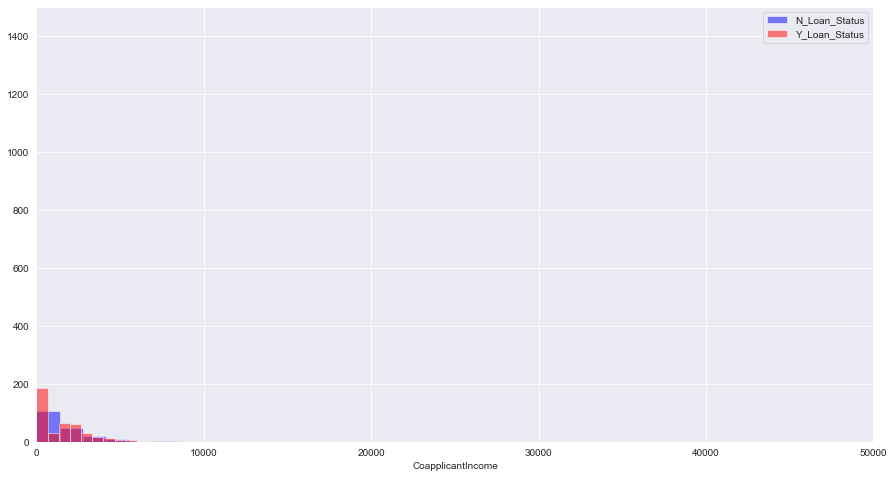

In [247]:
# sns.set_style('darkgrid')
# plt.figure(figsize=(15,8))
# LP[LP['Loan_Status']== 'N']['CoapplicantIncome'].hist(alpha=0.5,color='blue',
#                                               bins=30,label='N_Loan_Status')
# LP[LP['Loan_Status']=='Y']['CoapplicantIncome'].hist(alpha=0.5,color='red',
#                                               bins=30,label='Y_Loan_Status')
# plt.legend()
# plt.xlabel('CoapplicantIncome')
# plt.xlim(0,50000)
# plt.ylim(0,1500);

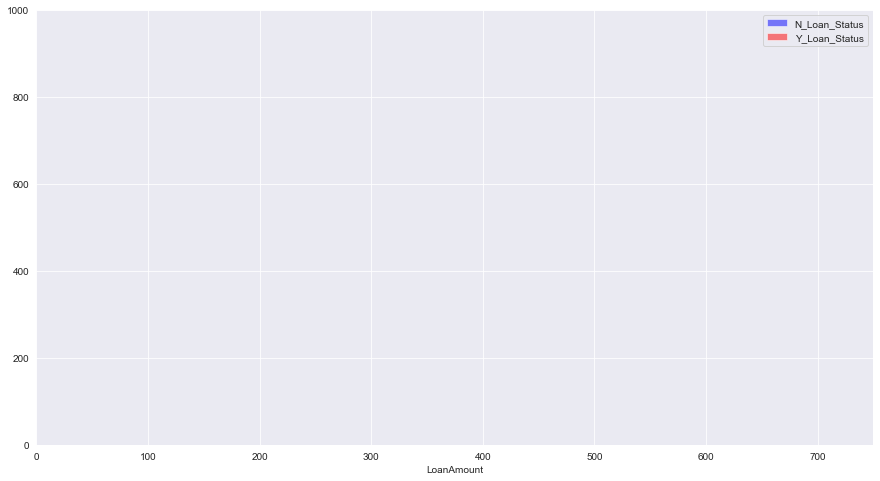

In [248]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,8))
LP[LP['Loan_Status']== 'No']['LoanAmount'].hist(alpha=0.5,color='blue',
                                              bins=30,label='N_Loan_Status')
LP[LP['Loan_Status']=='Yes']['LoanAmount'].hist(alpha=0.5,color='red',
                                              bins=30,label='Y_Loan_Status')
plt.legend()
plt.xlabel('LoanAmount')
plt.xlim(0,750)
plt.ylim(0,1000);

In [249]:
data = getProbOfLoan("ApplicantIncome","Loan_Status",LP)

   ApplicantIncome  N  Y  TotalCount  Loan_Status
0            150.0  1  0           1          0.0
1            210.0  0  1           1          1.0
2            416.0  1  0           1          0.0
3            645.0  0  1           1          1.0
4            674.0  0  1           1          1.0


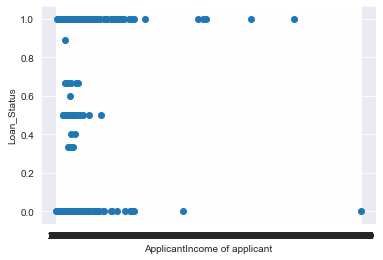

In [250]:
# plt.scatter(data["ApplicantIncome"], data["Loan_Status"])
# plt.xticks(np.arange(np.min(LP["ApplicantIncome"]),np.max(LP["ApplicantIncome"]),10))
# plt.xlabel("ApplicantIncome of applicant")
# plt.ylabel("Loan_Status")

# plt.show()

In [251]:
LP["ApplicantIncome"].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [252]:
# bins = [0, 2500, 6000,10000,81000]
# print(bins)

In [253]:
LP["Binned_ApplicantIncome"]=pd.qcut(LP["ApplicantIncome"], q=4,precision=0,labels=["Low","Average","High","Veryhigh"])

In [254]:
LP["Binned_ApplicantIncome"].value_counts(sort=True,ascending=True)

Average     153
High        153
Low         154
Veryhigh    154
Name: Binned_ApplicantIncome, dtype: int64

  Binned_ApplicantIncome   N    Y  TotalCount  Loan_Status
0                    Low  48  106         154     0.688312
1                Average  48  105         153     0.686275
2                   High  47  106         153     0.692810
3               Veryhigh  49  105         154     0.681818


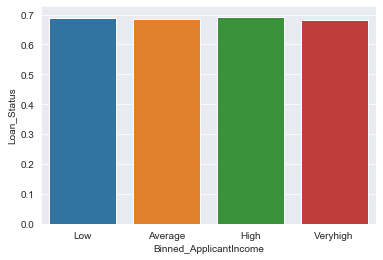

In [255]:
sns.barplot(x = 'Binned_ApplicantIncome',y = 'Loan_Status', data=getProbOfLoan('Binned_ApplicantIncome', 'Loan_Status',LP))

In [256]:
print(LP["CoapplicantIncome"].max())
print(LP["CoapplicantIncome"].min())

41667.0
0.0


In [257]:
LP["CoapplicantIncome"].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

In [258]:
#bins_a=[0,1000,3000,42000]
LP["Binned_CoapplicantIncome"]=pd.qcut(LP["CoapplicantIncome"], q=4,labels=["Low","Average","High"],duplicates= 'drop')

In [259]:
bins_1=[0,1000,3000,42000]
LP["Binned_CoapplicantIncome_1"]=pd.cut(LP["CoapplicantIncome"],bins_1,labels=["Low","Average","High"],duplicates= 'drop')

In [260]:
LP["Binned_CoapplicantIncome_1"].value_counts(sort=True,ascending=True)

Low         22
High        97
Average    222
Name: Binned_CoapplicantIncome_1, dtype: int64

In [261]:
LP["Binned_CoapplicantIncome"].value_counts(sort=True,ascending=True)

Average    153
High       154
Low        307
Name: Binned_CoapplicantIncome, dtype: int64

  Binned_CoapplicantIncome   N    Y  TotalCount  Loan_Status
0                      Low  99  208         307     0.677524
1                  Average  45  108         153     0.705882
2                     High  48  106         154     0.688312


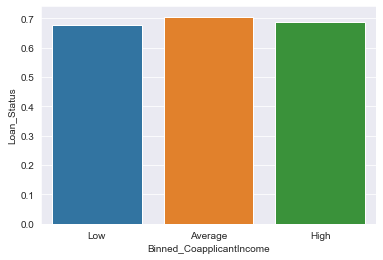

In [262]:
sns.barplot(x = 'Binned_CoapplicantIncome',y = 'Loan_Status', data=getProbOfLoan('Binned_CoapplicantIncome', 'Loan_Status',LP))

  Binned_CoapplicantIncome_1   N    Y  TotalCount  Loan_Status
0                        Low   3   19          22     0.863636
1                    Average  61  161         222     0.725225
2                       High  32   65          97     0.670103


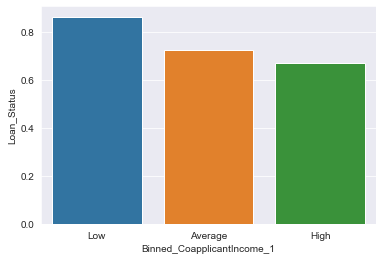

In [263]:
sns.barplot(x = 'Binned_CoapplicantIncome_1',y = 'Loan_Status', data=getProbOfLoan('Binned_CoapplicantIncome_1', 'Loan_Status',LP))

In [264]:
# low coapplicant income has high chances of getting Loan

In [265]:
#creating a new feature as Total Income

In [266]:
LP["Total_Income"]=LP["ApplicantIncome"]+LP["CoapplicantIncome"]

In [267]:
LP["Total_Income"].describe()

count      614.000000
mean      7024.705081
std       6458.663872
min       1442.000000
25%       4166.000000
50%       5416.500000
75%       7521.750000
max      81000.000000
Name: Total_Income, dtype: float64

In [268]:
LP["Binned_Total_Income"]=pd.qcut(LP["Total_Income"],q=4,labels=["Low","Average","High","Veryhigh"])

In [269]:
LP["Binned_Total_Income"].value_counts()

Low         155
Veryhigh    154
High        153
Average     152
Name: Binned_Total_Income, dtype: int64

  Binned_Total_Income   N    Y  TotalCount  Loan_Status
0                 Low  50  105         155     0.677419
1             Average  48  104         152     0.684211
2                High  44  109         153     0.712418
3            Veryhigh  50  104         154     0.675325


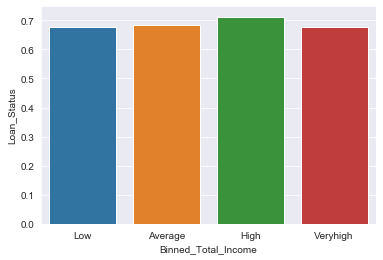

In [270]:
sns.barplot(x = 'Binned_Total_Income',y = 'Loan_Status', data=getProbOfLoan('Binned_Total_Income', 'Loan_Status',LP))

In [271]:
#Low income applicant has low chances of getting loan compared Average and Veryhigh.High income has high probability of getting job.

In [272]:
LP["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [273]:
LP["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [274]:
LP["Loan_Status"].replace(to_replace={"Y":"1","N":"0"},inplace=True)

In [275]:
LP["Loan_Status"].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [276]:
LP.dtypes

Gender                        category
Married                       category
Dependents                    category
Education                     category
Self_Employed                 category
ApplicantIncome                float64
CoapplicantIncome              float64
LoanAmount                     float64
Loan_Amount_Term               float64
Credit_History                category
Property_Area                 category
Loan_Status                     object
Binned_ApplicantIncome        category
Binned_CoapplicantIncome      category
Binned_CoapplicantIncome_1    category
Total_Income                   float64
Binned_Total_Income           category
dtype: object

                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.116605    0.570909   
CoapplicantIncome        -0.116605           1.000000    0.188619   
LoanAmount                0.570909           0.188619    1.000000   
Loan_Amount_Term         -0.045306          -0.059878    0.039447   
Total_Income              0.893037           0.342781    0.624621   

                   Loan_Amount_Term  Total_Income  
ApplicantIncome           -0.045306      0.893037  
CoapplicantIncome         -0.059878      0.342781  
LoanAmount                 0.039447      0.624621  
Loan_Amount_Term           1.000000     -0.069948  
Total_Income              -0.069948      1.000000  


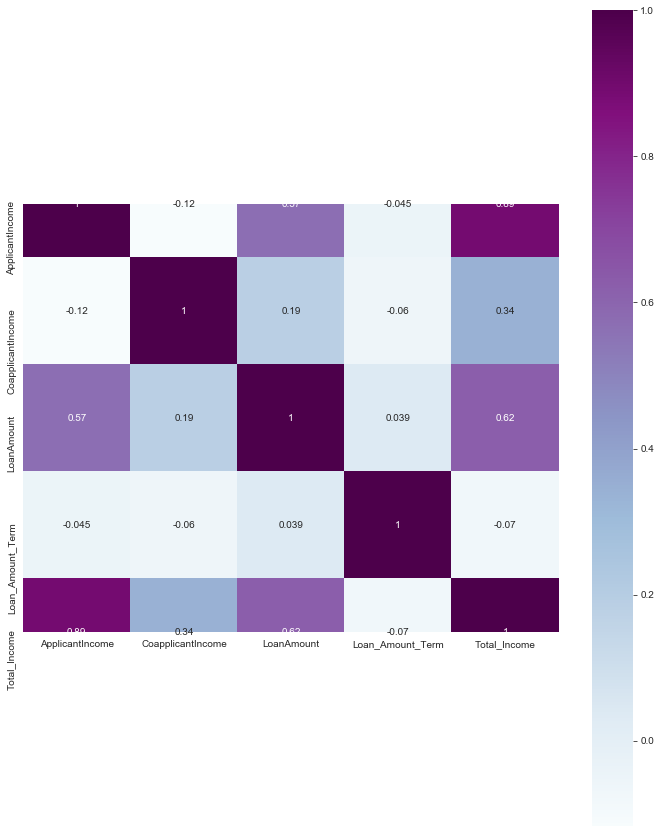

In [277]:
correlation=LP.corr()
print(correlation)
f, ax = plt.subplots(figsize=(12, 15))
#f, ax = plt.subplots(figsize=(12, 10))
#
# Generate a mask for upper traingle
#
#mask = np.triu(np.ones_like(correlation, dtype=bool))
#sns.heatmap(correlation, annot=True, mask = mask, cmap="BuPu")
sns.heatmap(correlation, square=True, cmap="BuPu",annot=True);#vmax=.8, 

In [278]:
#from this we can see that ApplicatntIncome is correlated with Loan_Amount and ApplicatntIncome and Total income has good correlation

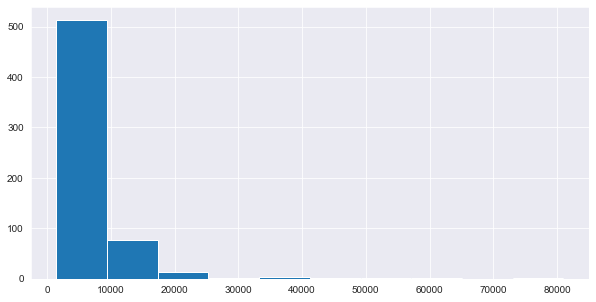

In [279]:
LP['Total_Income'].hist(figsize=(10, 5))

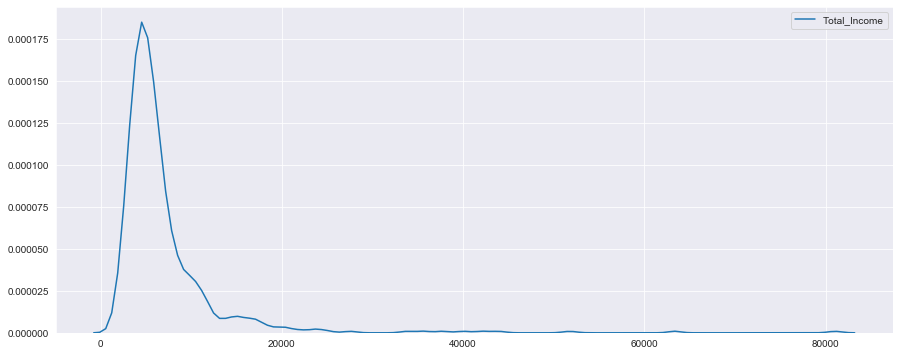

In [280]:
plt.figure(figsize = (15,6))
sns.kdeplot(LP['Total_Income'])
#plt.xlim((0,480)); 

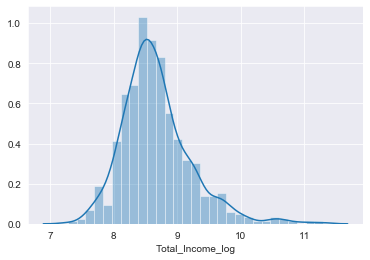

In [281]:
LP["Total_Income_log"]=np.log(LP["Total_Income"])
sns.distplot(LP["Total_Income_log"])

In [282]:
LP.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Binned_ApplicantIncome', 'Binned_CoapplicantIncome',
       'Binned_CoapplicantIncome_1', 'Total_Income', 'Binned_Total_Income',
       'Total_Income_log'],
      dtype='object')

In [283]:
LP["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [284]:
LP["EMI"]=LP["LoanAmount"]/LP["Loan_Amount_Term"]

In [285]:
LP["EMI"].value_counts()

0.333333    17
0.305556    16
0.277778    12
0.444444    11
0.519444    10
0.355556    10
0.361111    10
0.311111     9
0.416667     9
0.377778     7
0.288889     7
0.263889     7
0.266667     7
0.375000     7
0.250000     6
0.208333     6
0.347222     6
0.319444     6
0.500000     6
0.383333     6
0.366667     6
0.313889     5
0.322222     5
0.388889     5
0.233333     5
0.222222     5
0.400000     5
0.555556     5
0.438889     5
0.194444     5
0.152778     4
0.338889     4
0.197222     4
0.369444     4
0.430556     4
0.225000     4
0.300000     4
0.363889     4
0.272222     4
0.513889     4
0.450000     4
0.372222     4
0.763889     3
0.480556     3
0.422222     3
0.777778     3
0.600000     3
0.708333     3
0.341667     3
0.344444     3
1.333333     3
0.666667     3
0.486111     3
0.258333     3
1.044444     3
0.235417     3
0.472222     3
0.183333     3
0.477778     3
0.316667     3
0.261111     3
0.350000     3
0.244444     3
0.297222     3
0.466667     3
0.200000     3
0.583333  

In [286]:
print(LP["EMI"].min())

0.025


In [287]:
print(LP["EMI"].max())

9.25


In [288]:
LP["Blance_amount"]=LP["Total_Income"]-LP["EMI"]

In [289]:
LP["Blance_amount"].describe()

count      578.000000
mean      7075.140669
std       6597.304273
min       1441.902778
25%       4165.690278
50%       5406.629167
75%       7539.124479
max      80999.000000
Name: Blance_amount, dtype: float64

In [290]:
print(LP["Blance_amount"].min())
print(LP["Blance_amount"].max())

1441.9027777777778
80999.0


In [291]:
LP.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Binned_ApplicantIncome', 'Binned_CoapplicantIncome',
       'Binned_CoapplicantIncome_1', 'Total_Income', 'Binned_Total_Income',
       'Total_Income_log', 'EMI', 'Blance_amount'],
      dtype='object')

In [293]:
LP.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term','Binned_ApplicantIncome', 'Binned_CoapplicantIncome',
       'Binned_CoapplicantIncome_1', 'Total_Income','Binned_Total_Income'],axis=1,inplace=True)

In [294]:
#   Feature Engineering


In [295]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

import statsmodels.api as sm

In [296]:
def find_chi2_independence(cat_col, target, df, alpha=0.05):
    data = df[[target, cat_col]]
    tab = sm.stats.Table.from_data(data)
    tab = tab.table_orig.to_numpy()
    print(f"---------------{target} Vs {cat_col} Chi Square Test of Independence -------------------")
    print(f"\n Contingency table :\n")
    print(tab)
    
    stat, p, dof, expected = chi2_contingency(tab)
    print(f"\n Expected table :\n")
    print(expected)
    
    print(f"The p value returned = {p} and degrees of freedom returned = {dof}")
    
    # interpret p-value
    print('significance(alpha) = %.3f' % (alpha))

    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)') 

In [297]:
cat_cols = list(LP.select_dtypes('category').columns)
print(cat_cols)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']


In [298]:
for col in cat_cols:
    find_chi2_independence(col,'Loan_Status',LP)#Gender,Dependents,Self_Employed

---------------Loan_Status Vs Gender Chi Square Test of Independence -------------------

 Contingency table :

[[ 37 150]
 [ 75 339]]

 Expected table :

[[ 34.84858569 152.15141431]
 [ 77.15141431 336.84858569]]
The p value returned = 0.7086529816451106 and degrees of freedom returned = 1
significance(alpha) = 0.050
Independent (fail to reject H0)
---------------Loan_Status Vs Married Chi Square Test of Independence -------------------

 Contingency table :

[[ 79 113]
 [134 285]]

 Expected table :

[[ 66.93289689 125.06710311]
 [146.06710311 272.93289689]]
The p value returned = 0.03439381301579988 and degrees of freedom returned = 1
significance(alpha) = 0.050
Dependent (reject H0)
---------------Loan_Status Vs Dependents Chi Square Test of Independence -------------------

 Contingency table :

[[107  36  25  18]
 [238  66  76  33]]

 Expected table :

[[107.12854758  31.67278798  31.36227045  15.83639399]
 [237.87145242  70.32721202  69.63772955  35.16360601]]
The p value return

In [302]:
LP.drop(["Gender","Self_Employed","Dependents"],axis=1,inplace=True)

In [303]:
from sklearn.feature_selection import f_classif

In [304]:
x = f_classif(LP[['Total_Income_log']], LP['Loan_Status'])
x[1] > 0.05
# The f_classification value is less than 0.05 so the MonthlyCharges is significant for model building

array([ True])

In [310]:
LP.columns

Index(['Married', 'Education', 'Credit_History', 'Property_Area',
       'Loan_Status', 'Total_Income_log', 'EMI', 'Blance_amount'],
      dtype='object')

In [311]:
LP.dtypes

Married             category
Education           category
Credit_History      category
Property_Area       category
Loan_Status           object
Total_Income_log     float64
EMI                  float64
Blance_amount        float64
dtype: object

In [313]:
LP["Loan_Status"]=LP["Loan_Status"].astype("category")
LP.dtypes

Married             category
Education           category
Credit_History      category
Property_Area       category
Loan_Status         category
Total_Income_log     float64
EMI                  float64
Blance_amount        float64
dtype: object

In [314]:
LP.isna().sum()

Married              3
Education            0
Credit_History      50
Property_Area        0
Loan_Status          0
Total_Income_log     0
EMI                 36
Blance_amount       36
dtype: int64

In [320]:
# cat_list=LP.select_dtypes("category").columns
# num_list=LP.select_dtypes("number").columns
# print(cat_list)
# print(num_list)

Index(['Married', 'Education', 'Credit_History', 'Property_Area',
       'Loan_Status'],
      dtype='object')
Index(['Total_Income_log', 'EMI', 'Blance_amount'], dtype='object')


In [ ]:
# ERROR METRIC

In [448]:
def get_CR_CM(train_actual,train_predicted,test_actual,test_predicted):
    print('''
         ========================================
           CLASSIFICATION REPORT FOR TRAIN DATA
         ========================================
        ''')
    print(classification_report(train_actual, train_predicted, digits=4))

    print('''
             =============================================
               CLASSIFICATION REPORT FOR VALIDATION DATA
             =============================================
            ''')
    print(classification_report(test_actual, test_predicted, digits=4))

    print('''
             ========================================
               Confusion Matrix FOR TRAIN DATA
             ========================================
            ''')
    print(confusion_matrix(train_actual, train_predicted))

    print('''
             =============================================
               Confusion matrix FOR VALIDATION DATA
             =============================================
            ''')
    print(confusion_matrix(test_actual, test_predicted))


In [461]:
scores = pd.DataFrame(columns=['Model','Train_Accuracy','Train_Recall','Train_Precision','Train_F1_Score','Test_Accuracy','Test_Recall','Test_Precision','Test_F1_Score'])

In [462]:
def get_metrics(train_actual,train_predicted,test_actual,test_predicted,model_description,dataframe):
    get_CR_CM(train_actual,train_predicted,test_actual,test_predicted)
    train_accuracy = accuracy_score(train_actual,train_predicted)
    train_recall   = recall_score(train_actual,train_predicted,pos_label="1")
    train_precision= precision_score(train_actual,train_predicted,pos_label="1")
    train_f1score  = f1_score(train_actual,train_predicted,pos_label="1")
    test_accuracy = accuracy_score(test_actual,test_predicted)
    test_recall   = recall_score(test_actual,test_predicted,pos_label="1")
    test_precision= precision_score(test_actual,test_predicted,pos_label="1")
    test_f1score  = f1_score(test_actual,test_predicted,pos_label="1")
    dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,train_precision,train_f1score,
                                            test_accuracy,test_recall,test_precision,test_f1score],
                                           index=scores.columns ), ignore_index=True)
    return(dataframe)

In [463]:
# Train test split

In [464]:
from sklearn.model_selection import train_test_split

In [465]:
y=LP["Loan_Status"]
X=LP.drop('Loan_Status', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123, stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(429, 7)
(185, 7)
(429,)
(185,)


In [466]:
cat_list=X_train.select_dtypes("category").columns
num_list=X_train.select_dtypes("number").columns
print(cat_list)
print(num_list)

Index(['Married', 'Education', 'Credit_History', 'Property_Area'], dtype='object')
Index(['Total_Income_log', 'EMI', 'Blance_amount'], dtype='object')


In [467]:
# # DataFrameMapper, a class for mapping pandas data frame columns to different sklearn transformations
# mapper = DataFrameMapper(
#   [([continuous_col], StandardScaler()) for continuous_col in num_list] +
#   [([categorical_col], OneHotEncoder(handle_unknown='error')) for categorical_col in cat_list]
# , df_out=True)

In [468]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score 
from sklearn.metrics import classification_report, confusion_matrix

In [469]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_list),
        ('cat', categorical_transformer, cat_list)])

In [470]:
# Model Building

In [471]:
#logistic_model = LogisticRegression(random_state=1)
log_model=Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(random_state=1))])


log_model.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [478]:
log_model.named_steps.preprocessor.named_transformers_

{'num': Pipeline(memory=None,
          steps=[('imputer',
                  SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                                missing_values=nan, strategy='median',
                                verbose=0)),
                 ('scaler',
                  StandardScaler(copy=True, with_mean=True, with_std=True))],
          verbose=False), 'cat': Pipeline(memory=None,
          steps=[('imputer',
                  SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                                missing_values=nan, strategy='most_frequent',
                                verbose=0)),
                 ('onehot',
                  OneHotEncoder(categorical_features=None, categories=None,
                                drop=None, dtype=<class 'numpy.float64'>,
                                handle_unknown='ignore', n_values=None,
                                sparse=True))],
          verbose=False)}

In [479]:
log_model.named_steps.preprocessor.named_transformers_['num']['imputer'].statistics_

array([8.61031917e+00, 3.72222222e-01, 5.46067778e+03])

In [481]:
log_model.named_steps.preprocessor.named_transformers_['cat']['imputer'].statistics_

array(['Yes', 'Graduate', 1.0, 'Semiurban'], dtype=object)

In [480]:
log_model.named_steps.preprocessor.named_transformers_['cat']['onehot'].get_feature_names(cat_list)

array(['Married_No', 'Married_Yes', 'Education_Graduate',
       'Education_Not Graduate', 'Credit_History_0.0',
       'Credit_History_1.0', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban'], dtype=object)

In [482]:
cat_list.isna().sum()

0

In [483]:
num_list.isna().sum()

0

In [484]:
y_pred_train = log_model.predict(X_train)
y_pred_test= log_model.predict(X_test)

In [485]:
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"LogisticRegression",scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

           0     0.8971    0.4552    0.6040       134
           1     0.7978    0.9763    0.8780       295

    accuracy                         0.8135       429
   macro avg     0.8474    0.7157    0.7410       429
weighted avg     0.8288    0.8135    0.7924       429


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           0     0.9545    0.3621    0.5250        58
           1     0.7730    0.9921    0.8690       127

    accuracy                         0.7946       185
   macro avg     0.8638    0.6771    0.6970       185
weighted avg     0.8299    0.7946    0.7611       185


               Confusion Matrix FOR TRAIN DATA
            
[[ 61  73]
 [  7 288]]

               Confusion matrix FOR VALIDATION DATA
            
[[ 21  37]
 [  1 126]]


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.81352,0.976271,0.797784,0.878049,0.794595,0.992126,0.773006,0.868966
1,LogisticRegression,0.81352,0.976271,0.797784,0.878049,0.794595,0.992126,0.773006,0.868966
2,LogisticRegression,0.81352,0.976271,0.797784,0.878049,0.794595,0.992126,0.773006,0.868966


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.81352,0.976271,0.797784,0.878049,0.794595,0.992126,0.773006,0.868966
